<center>


<div style="display: flex; justify-content: center;">
    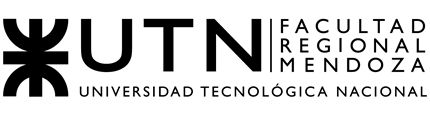
</div>
</center>
<center>
    <div style="font-family: 'Georgia', serif; font-size: 24px;">
        <p><strong>Ingeniería electrónica. Análisis de Señales y Sistemas</strong></p>
        <!--<p><em>Profesor Mg. Ing. Javier Velez</em></p>-->
    </div>
</center>


# 0. Preparativos — importaciones básicas

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Configuración de SymPy
sp.init_printing()

> 💡 **Tip**  
> En Jupyter podés ejecutar celdas con **Shift + Enter** 



# 1. Representaciones y operaciones básicas

Un número complejo puede describirse en:


- Cartesiana  $z = x + jy$ Parte real $x$, parte imaginaria $y$ 
-  Polar $z = r e^{j\theta}$  Módulo $r$, ángulo $\theta$ 
- Trigonométrica  $z = r(\cos\theta + j\sin\theta)$  Igual que la polar, usando la identidad de Euler 

A continuación trabajaremos con un ejemplo guiado 👇


### Ejemplo guiado 1 — de cartesiana a polar (paso a paso)

En este ejemplo partiremos del número complejo

\[ z = 3 + 4j \]

1. **Forma cartesiana**.  

   La construimos directamente como `z = 3 + 4j` (recordá que en Python la unidad imaginaria es `j`).

2. **Módulo** `|z|` y **argumento** $	\theta$.  

   *Con NumPy* existen funciones rápidas: `abs(z)` y `np.angle(z)`.

3. **Impresión con formato**.  

   Usaremos *f‑strings* y especificadores `:.2f`, `:.3f`:

   * `:.2f` → número con **2 decimales** (\*.2f ≡ formato float de 2 dígitos).  

   * `:.3f` → número con **3 decimales**.

4. **Conversión simbólica** con **SymPy** para obtener $z = r e^{j	\theta}$ de manera exacta.  

   Aquí aparece `sp.nsimplify`, que intenta convertir un número decimal al racional/raíz exacta correspondiente.


In [ ]:
z = 3 + 4j           # forma cartesiana
r = abs(z)            # módulo
theta = np.angle(z)   # ángulo (rad)
print(f"z = {z}")
print(f"|z| = {r:.2f}")
print(f"θ   = {theta:.3f} rad")


**Nota**  

`abs` es una función built‑in de Python que, para complejos, devuelve el módulo.  

`np.angle` entrega el ángulo en **radianes**.


In [ ]:
# Ejemplo guiado 1 · parte B — SymPy (representación exacta)
z_sym = sp.nsimplify(z)           # convierte 3+4j → 3 + 4⋅I (exacto)
polar_sym = sp.Abs(z_sym) * sp.exp(sp.I * sp.arg(z_sym))
polar_sym

En la salida de arriba SymPy muestra **exactamente** $5 e^{0.927…\,j}$, donde $5$ es \(|z|\) y $0.927…$ el ángulo. `sp.nsimplify` asegura que, si la parte decimal representa un valor racional sencillo, lo muestre como tal (no es imprescindible, pero ayuda a obtener fracciones limpias).

---

### Actividad 1

Completá el siguiente código  para:

1. Pedir al usuario (función `input`) los valores de $x$ e $y$.

2. Construir el número complejo $z = x + jy$.

3. Imprimir su módulo y su fase en grados.

4. Mostrar el punto en el plano (usar `plt.scatter`).

In [ ]:
# 🔧 TU CÓDIGO AQUÍ
# --------------------------------------


# 2. Mapeo de curvas

Los **mapeos** (o transformaciones) muestran cómo una función compleja $f$ deforma puntos y curvas del plano $z$ hacia el plano $w$.  

Aquí exploraremos el mapeo de un **círculo unitario** mediante la función  
$$ f(z)=z^2 $$

**Idea clave**  

Si escribimos un punto en forma polar $z = r·e^{j\theta}$, al aplicar $f$ obtenemos  

$f(z)=r^2 e^{j 2\theta}$.

1. El **radio** se **eleva al cuadrado**.

2. El **ángulo** se **duplica**.


## 2.1 Definimos la curva original `C`

Describiremos la curva dada por una semicircunferencia donde $\theta$ varía entre $0$ y $\pi$

Para esto definiremos un vector de numpy llamado `theta` que varía entre $0$ y $\pi$ tomando $500$ puntos. Luego creamos la curva utilizando la expresión ya obtenida.


In [ ]:
# Definición de la curva original C (círculo unitario)
theta = np.linspace(0, np.pi, 500)      # parámetro θ
C = np.exp(1j * theta)                    # z = e^{jθ}

**Explicación del código**
* `np.linspace(a, b, N)` genera N valores equiespaciados desde *a* hasta *b*.
* `1j` es la unidad imaginaria en Python.
* `np.exp(1j*t)` evalúa $e^{j\theta}$ para cada $\theta$.


Grafiquemos la curva original:

In [ ]:
# Gráfico de la curva original
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(C.real, C.imag)
ax.set_aspect('equal')
ax.set_title('Curva original  $C : |z|=1$')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.grid(True)
plt.show()

## 2.2 Aplicamos el mapeo $f(z)=z^2$ a nuestra curva $C$

Para esto elevamos al cuadrado todos los elementos de C

In [ ]:
C_mapeada = C**2

`C_mapeada` contiene la imagen de cada punto de `C` bajo el mapeo `z → z²`

## 2.3 Gráfico comparativo:

In [ ]:
# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(C.real, C.imag)
ax1.set_title('Plano z  —  curva C')
ax1.set_aspect('equal'); ax1.grid(True)

ax2.plot(C_mapeada.real, C_mapeada.imag, 'r')
ax2.set_title('Plano w  —  imagen f(C)')
ax2.set_aspect('equal'); ax2.grid(True)

plt.show()

El semi círculo pasa a ser un círculo de radio 1 porque |z|=1 ⇒ |z|^2=1.  

El punto $\theta = 0$ en $C$ va a $\theta = 0$ en $f(C)$, pero $\theta = \pi$ va a $\theta = 2\pi$.

En resumen, la semi circunferencia se mapea en una circunferencia completa superponiendo puntos extremos.

## 2.4 Actividad   (🌟 puesta en práctica)

En esta actividad vas a **explorar el mapeo de un segmento recto** mediante la función recíproca.

Repetí TODO el proceso presentado anteriormente para:

- **Curva:** segmento rectilíneo que une $z=0$ con $z=1+j$  
- **Función:** $f(z)=1/z$

**Cuidado con la división por cero**  

La función `f(z)=1/z` **no está definida en _z = 0_**.  

Para evitar el error:

* Construí la curva con un parámetro que **empiece en un pequeño ε > 0** (por ejemplo `ε = 1e-3`) en lugar de incluir el punto 0.  

* Otra opción es usar `np.linspace(ε, 1, N, endpoint=True)` tanto para la componente real `x` como para la componente imaginaria `y`.


Sugerencia: 
primero definí el segmento que une el origen con `1 + j`, evitando el punto 0:  
   ```python
   eps = 1e-3                # pequeño desplazamiento
   t = np.linspace(eps, 1, 300)
   C_seg = t + 1j*t          # z(t) = t + j t
   ```


1. Define la curva $C$

In [ ]:
# 🔧 TU CÓDIGO AQUÍ


2. Grafica el segmento en el plano z.

In [ ]:
# 🔧 TU CÓDIGO AQUÍ


3. Aplica el mapeo y crea un gráfico de comparación:

In [ ]:
# 🔧 TU CÓDIGO AQUÍ


# 3. Funciones armónicas conjugadas  

Una **función armónica** satisface la ecuación de Laplace  

$$
\nabla^{2}u \;=\; \frac{\partial^{2}u}{\partial x^{2}} +
                 \frac{\partial^{2}u}{\partial y^{2}} = 0.
$$  

Si $$f(z)=u(x,y)+iv(x,y)$$ es **analítica**, entonces  
sus partes real e imaginaria verifican las **ecuaciones de Cauchy‑Riemann (C‑R)**  

$$
\frac{\partial u}{\partial x}= \frac{\partial v}{\partial y},
\qquad
\frac{\partial u}{\partial y}= -\frac{\partial v}{\partial x}.
$$  


Trabajaremos paso a paso con `sympy` y explicaremos cada
función de Python que aparece.

Nuestro objetivo: hallar la conjugada armónica de  

$$
u(x,y)=x^{2}-y^{2}.
$$

Paso 1 – definir símbolos y la función u

In [ ]:

import sympy as sp
x, y = sp.symbols('x y', real=True)
u = x**2 - y**2
u



**Paso 2 – calcular derivadas parciales de $u$**  

Necesitamos $u_x$ y $u_y$ para las ecuaciones C‑R.

In [ ]:
u_x = sp.diff(u, x)  # derivada parcial de u respecto a x
u_y = sp.diff(u, y) # derivada parcial de u respecto a y
u_x, u_y


Resultado:  

$$
u_x = 2x, \qquad u_y = -2y.
$$

Según C‑R la segunda derivada que necesitamos es $v_x = -u_y$ .

**Paso 3 – integrar $v_x$ para obtener una expresión preliminar de $v$.**


In [ ]:
# v_x = -u_y  ⇒  v_x = 2y
v_x = -u_y
v_provisional = sp.integrate(v_x, x)   # integramos respecto a x
v_provisional


La integración introduce una **“constante de integración”** que puede depender solo de *y*, la denotamos $C(y)$:

$$
v(x,y)=2xy + C(y).
$$

**Paso 4 – imponer la otra ecuación C‑R**  

Recordemos que $u_x = v_y$.  Derivemos $v$ respecto a *$y$*:


In [ ]:
C = sp.Function('C')            # C(y) aún desconocida
v = 2*x*y + C(y)                # expresión general
v_y = sp.diff(v, y)             # v_y  debe igualar u_x = 2x
v_y


Obtenemos  :
$$
v_y = 2x + C'(y).
$$  

Para satisfacer $v_y = u_x = 2x$ se requiere $C'(y)=0$ ⇒ **$C(y)=\text{constante}$**.

Podemos tomar la constante 0.  

Así hallamos la **conjugada armónica definitiva**:

$$
\boxed{\,v(x,y) = 2\,x\,y\,}.
$$

**Paso 5 – construir la función analítica**  
$f(z)=u+iv$


In [ ]:
v_final = 2*x*y                      # constante omitida
f = sp.Matrix([u, v_final])          # solo para mostrar (u,v)
f


💡 **Comprobación rápida**  

Podemos expresar $f(z)$ directamente en función de $z=x+iy$:  

$$
f(z)=x^{2}-y^{2}+\,i(2xy)= (x+iy)^{2}=z^{2},
$$

confirmando que efectivamente es analítica.




## 3.1 Actividad 


1. Repetí TODO el procedimiento para cada $u(x,y)$:  

   a) $u = e^{x}\cos y$  

   b) $ u = x\,y$

2. Verifica que $u$ y la $v$ hallada satisfacen Laplace y C‑R.  

3. Construye $f(z)=u+iv$ y simplifícala con `sympy.simplify`.

 **Tip SymPy**   

 *Integrar con variable múltiple*  


 `sp.integrate(expr, (x,))`    integra respecto a x
 
 `sp.integrate(expr, (y,))`    integra respecto a y


In [ ]:
# 🔧 TU CÓDIGO AQUÍ

# 4. Series de **Taylor** y **Laurent** con SymPy  

Las series de potencias son una herramienta clave para “aproximar” o representar
funciones analíticas.  
En Python, la librería **SymPy** ofrece el método `series()` para generar
tanto series de **Taylor** como de **Laurent**.

Recordemos:  

* **Serie de Taylor** de una función $f(z)$ en torno a $z_0$  
  $$f(z)=\sum_{n=0}^{\infty} \frac{f^{(n)}(z_0)}{n!}\,(z-z_0)^{\,n}.$$

* **Serie de Laurent** (permite potencias negativas)  
  $$f(z)=\sum_{n=-\infty}^{\infty} a_{n}\,(z-z_0)^{\,n}.$$

A continuación veremos **cómo utilizar** `series()` paso a paso.

Primero debemos importar SymPy y declarar la variable simbólica:


In [ ]:
import sympy as sp
z = sp.symbols('z')   # variable compleja formal

## 4.1 — Serie de Taylor de $e^{z}$ alrededor de $z_0=0$

La sintaxis básica es  

`expr.series(var, point, n)`

- `expr` – expresión simbólica a expandir.

- `var` – variable respecto a la cual se hace la serie.

- `point` – punto de expansión ($z_0$).

- `n` – orden: genera términos hasta $(z-z_0)^{n-1}$.

Por defecto el resultado incluye un término “$O!\bigl(z^{n}\bigr)$” que representa el resto.

In [ ]:
expr = sp.exp(z)                   # función e^z
taylor = expr.series(z, 0, 6)      # hasta z^5
taylor

`series()` nos devuelve  

$$
1 + z + \frac{z^{2}}{2} + \frac{z^{3}}{6} + \frac{z^{4}}{24}
+ \frac{z^{5}}{120} \;+\; O\!\bigl(z^{6}\bigr).
$$

## 4.2 Serie de Laurent con `series()`

Para obtener potencias **negativas** necesitamos una expansión
alrededor de una **singularidad** de la función.  

El argumento `n` sigue indicando *cuántos* términos se generan, pero
ahora incluye también los exponentes negativos
$\,z^{-1}, z^{-2},\dots$.

**Ejemplo**  
Sea  

$$
g(z)=\frac{1}{z\,(z-1)}.
$$

Queremos su serie de Laurent alrededor de $z_0 = 0$.


In [ ]:
g = 1 / (z*(z - 1))

# genera términos desde z^{-1} hasta z^{4} (5 potencias diferentes de 0 en total)
laurent = g.series(z, 0, 5)    # 5 potencias de z en total
laurent

La salida incluye el resto  

$$
O\!\bigl(z^{3}\bigr),
$$ 

lo que indica que los términos a partir de $z^{3}$ se omiten:

$$
-\frac{1}{z} - 1 - z - z^2 - z^3 - z^4+ O(z^5).
$$

Notar que los 5 términos de potencias de $z$ distintas de cero que incluye la función `series()` en este caso contiene potencias negativas de $z$.


## 4.3 Actividad 4 🚀  

En esta actividad practicarás el uso de **`series()`** para obtener:

1. una **serie de Taylor** de $\cos z$ hasta $z^{6}$,  

   alrededor de $z_0=0$ que incluya los términos hasta $\displaystyle\frac{1}{z^{2}}$.




In [ ]:
# 🔧 TU CÓDIGO AQUÍ


2. una **serie de Laurent** de  
   $$
   f(z)=\dfrac{1}{z^2\,(z-2)}
   $$  

    alrededor de $z_0=0$ 

In [ ]:
# 🔧 TU CÓDIGO AQUÍ

# 5. Teorema de los **residuos** 

## 5.1 ¿Qué es un **residuo**?

Sea la serie de Laurent de $f(z)$ alrededor de $z_0$:  

$$
f(z)=\sum_{n=-\infty}^{\infty} a_n\,(z-z_0)^{\,n}.
$$  

El **residuo** en $z_0$ es el coeficiente  
$$a_{-1}\;=\;\text{Res}\bigl[f(z),\,z_0\bigr].$$  




## 5.2  Teorema de los residuos  

Si $f$ es analítica en una región $D$ excepto en los polos
$z_1,\dots,z_k$ contenidos dentro de una curva cerrada $C$,
entonces  

$$
\oint_C f(z)\,dz \;=\; j 2\pi 
        \sum_{j=1}^k \text{Res}\!\bigl[f(z),\,z_j\bigr].
$$  

Es decir: **integrar** $f$ sobre $C$ equivale a sumar
los residuos interiores y multiplicar por $j2\pi $.

## 5.3  Cálculo de residuos con SymPy  

`SymPy` ofrece la rutina  
```python
sp.residue(expr, z, z0)
```
Donde:

- `expr` – función simbólica.

- `z` – variable.

- `z0` – punto donde se desea el residuo.

# 5. 4  Ejemplo 

Consideremos integrar la función

$$
f(z)=\frac{z+1}{z\,(z-\tfrac12)^{3}}.
$$
Sobre la trayectoria

$$C:\;|z|=1$$  




* **Polos dentro de $|z|\lt 1$**  

  * $z=0$   (polo simple, orden 1)  

  * $z=\tfrac12$   (polo de **orden 3**)


Analicemos paso a paso.


In [ ]:
# Importamos SymPy y declaramos la variable simbólica
import sympy as sp
z = sp.symbols('z')

# Definimos la función f(z)
f = (z + 1) / ( z * (z - sp.Rational(1, 2))**3 )
f


### Paso 1 — Residuo en $z=0$ (polo simple)


In [ ]:
res0 = sp.residue(f, z, 0)
res0

### Paso 2 — Residuo en $z=\tfrac12$ (polo de orden 3)


In [ ]:
res05 = sp.residue(f, z, sp.Rational(1, 2))
res05

### Paso 3 — Valor de la integral


In [ ]:
I = sp.I * 2 * sp.pi *  (res0 + res05)
I_simplified = sp.simplify(I)
I_simplified


El resultado es  

$$
\boxed{\,I = j2\pi \left(8-8\right)=0.}
$$


## 5.5 Actividad

Encontrar el valor de la integral:

$$
\oint_C \frac{z}{(z-1)(z-2)^2} \quad C: |z-2| = \frac{1}{2}
$$

In [ ]:
# 🔧 TU CÓDIGO AQUÍ

## ✨ Cierre

Hoy exploraste cómo **Python** puede ser tu aliado para entender
la variable compleja:

* convertiste números complejos entre formas,

* visualizaste mapeos de curvas,

* calculaste funciones armónicas conjugadas,

* obtuviste series y residuos de manera simbólica.


📚 **Siguiente paso:** profundiza practicando los ejercicios y
explora la documentación oficial de **SymPy** y **NumPy**.


© UTN FRM — 2025  
